In [1]:
#Importar dependencias

In [4]:
from scipy.io.wavfile import read
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [12]:
#Cargue, grafique, y escuche la señal de audio que acompaña esta guía
#https://audio.online-convert.com/es/convertir-a-wav
fs, x=read("SenalDigital.wav")
#WAV, apócope de Waveform audio file format, es un formato de audio digital con o sin compresión de datos desarrollado
#por Microsoft e IBM que se utiliza para almacenar flujos digitales de audio en el PC, mono y estéreo a diversas resoluciones
#y velocidades de muestreo. 

# estandarización de la señal de audio
x=x-np.mean(x) # eliminar nivel DC
x=x/np.max(np.abs(x)) # normalizar en amplitud a 0dB
Audio(x, rate=fs)

In [6]:
#Creación de la señal analogica
#La versión de señal análoga será una simulación donde se usarán valores flotantes con el fin de acercarnos a
# una precisión infinita.
#Para ello se va a re-escalar el audio cargado en la parte anterior entre -100 y 100, de la siguiente forma.

In [7]:
norm = 1.0 / max(np.absolute([min(x), max(x)]))
sA = 100.0 * x * norm

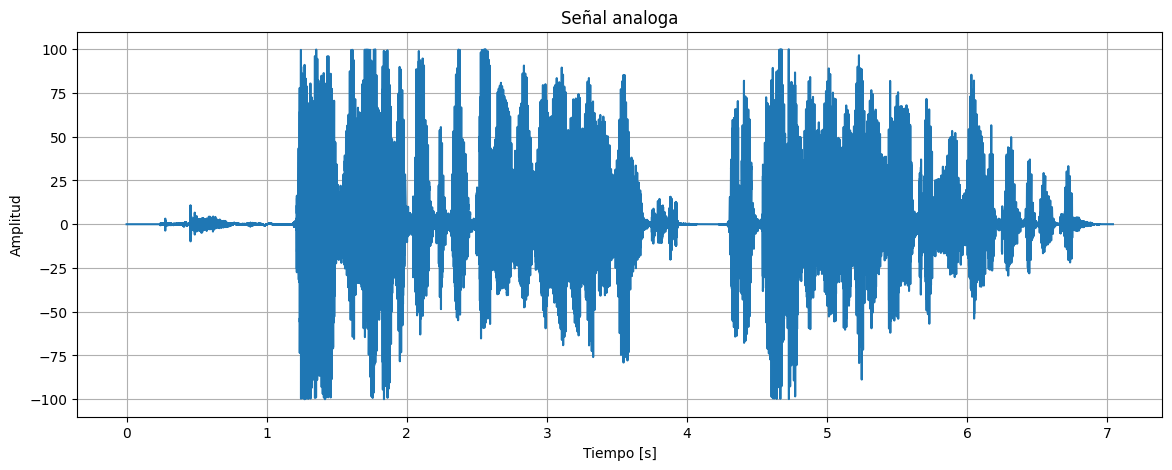

In [8]:
plt.figure(figsize=(14,5))
t=np.arange(len(sA))/fs
plt.plot(t,sA)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.title("Señal analoga")
plt.show()

In [25]:
#Creación de la señal digital

In [9]:
#La señal digital será simplemente una versión redondeada de la señal análoga, usando números enteros entre -100 y 100
#para obtener una resolución aproximada de 8 bits por muestra. Use la instrucción np.round() para obtener la señal digital
#a partir de la señal análoga.

sD=np.round(sA)

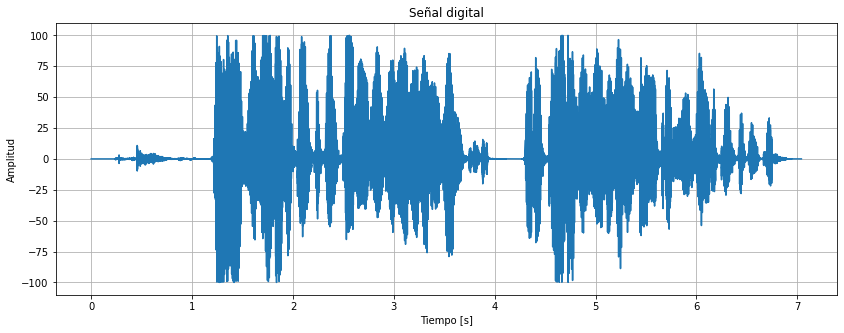

In [28]:
plt.figure(figsize=(14,5))
t=np.arange(len(sA))/fs
plt.plot(t,sA)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.title("Señal digital")
plt.show()

In [29]:
#Relación señal a ruido
#Calcule la relación señal a ruido entre la señal digital y la señal análoga. Para ello puede usar la siguiente función.

In [10]:
def SNR(noisy, original):
    # power of the error
    err = np.linalg.norm(original-noisy)
    # power of the signal
    sig = np.linalg.norm(original)
    # SNR in dBs
    return 10 * np.log10(sig/err)

In [11]:
SNRdig=SNR(sD, sA)

print("La relacion señal a ruido es de "+str(SNRdig)+" dB")

La relacion señal a ruido es de 18.32063272765953 dB
